<a href="https://colab.research.google.com/github/NadAAaHH/Customer-segmentation/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing Python Libraries**

In [ ]:
# importing libraries for data handling and analysis
import pandas as pd
import numpy as np

In [ ]:
# importing libraries for data visualisations
import seaborn as sns
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer

In [ ]:
# importing libraries for modeling
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

## **Importing the Data**

In [ ]:
# Include the full path to the csv file containing the dataset
df = pd.read_csv('/Data/Marketing_data.csv')

In [ ]:
df.shape

(8950, 18)

> The dataset contains **8,950 rows** and **18 columns**.

## **Data Exploration & Processing**

> This section will use Pandas exploration functions to explore and analyze the dataset in more detail.

In [ ]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

> The dataset contains numerical features (int, float) and only one object feature.  
Additionally, it appears that there are some missing values in the dataset.

### Exploratory Data Analysis (EDA)

<ipython-input-11-1c0f5c3cf05c>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


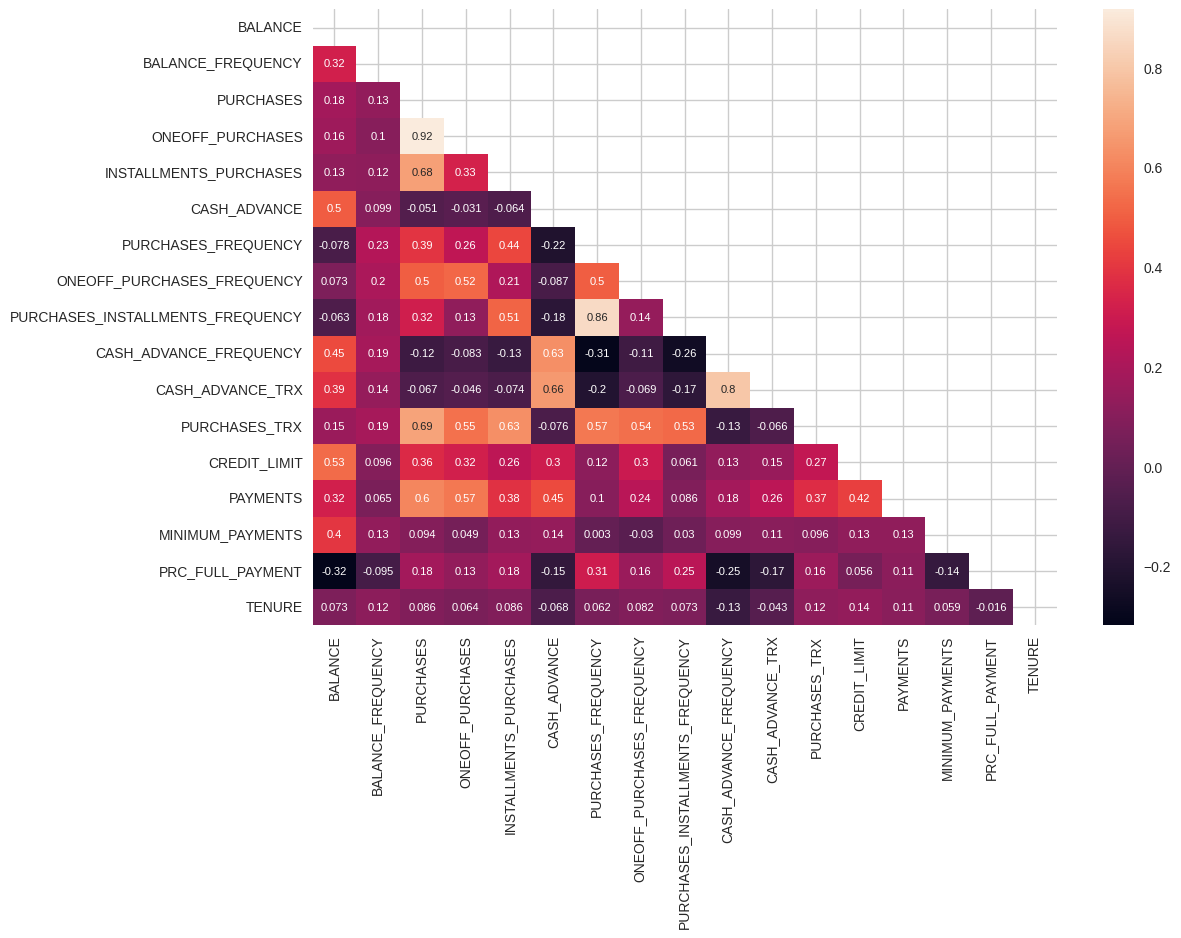

In [ ]:
# Create a correlation heatmap of the features
f, ax = plt.subplots(figsize=(12, 8))
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot = True, annot_kws={"fontsize":8}, mask=mask);

> Some observations based on the above heatmap:
* `CREDIT_LIMIT` have a high correlation with `BALANCE`.
* `PURCHASES` have a high correlation with multiple features, which is reasonable. But it does have slightly a negative correlation with all the Cash in Advance features.
*   `PAYMENTS` also have a high correlation with multiple features, which is reasonable considering that many features represent different methods of payments.
*   `BALANCE` have a high correlation with all the Cash in Advance features.









> The following steps will focus on exploring the relationship between features using various types of plots.  

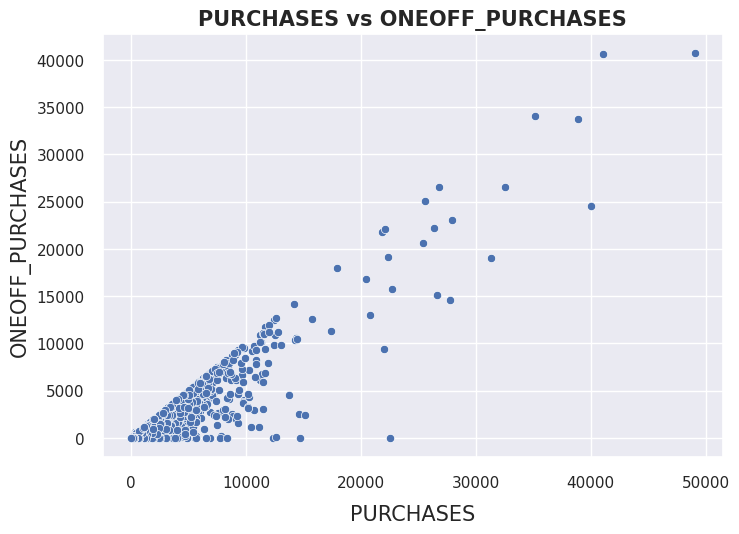

In [ ]:
sns.set(style="darkgrid")
sns.scatterplot(data = df, x = 'PURCHASES', y= 'ONEOFF_PURCHASES')

plt.xlabel("PURCHASES", fontsize=15, labelpad=10)
plt.ylabel("ONEOFF_PURCHASES", fontsize=15)
plt.title("PURCHASES vs ONEOFF_PURCHASES", fontweight="bold", fontsize=15)

plt.show()

> The plotted data points is forming an upward pattern from left to right, which refers to a high correlation between the two features as indicated by the heatmap. This correlation could imply that most purchases were one-off purchases.  
The distant datapoints may be due to the large number of outliers in the dataset or other factors.

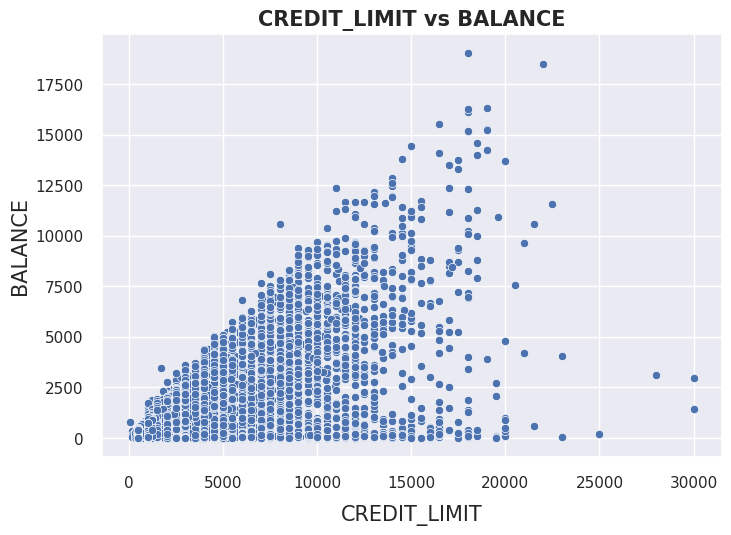

In [ ]:
sns.scatterplot(data = df, x = 'CREDIT_LIMIT', y= 'BALANCE')

plt.xlabel("CREDIT_LIMIT", fontsize=15, labelpad=10)
plt.ylabel("BALANCE", fontsize=15)
plt.title("CREDIT_LIMIT vs BALANCE", fontweight="bold", fontsize=15)

plt.show()

> The scatter plot is somewhat forming an angeld triangle, where the hypotenuse of the triangle is hinting for a correlation between the two features.

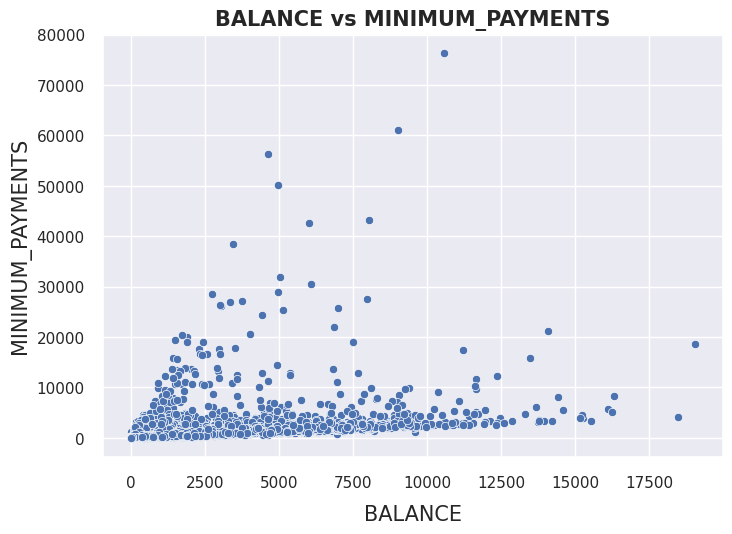

In [ ]:
sns.scatterplot(data = df, x = 'BALANCE', y= 'MINIMUM_PAYMENTS')

plt.xlabel("BALANCE", fontsize=15, labelpad=10)
plt.ylabel("MINIMUM_PAYMENTS", fontsize=15)
plt.title("BALANCE vs MINIMUM_PAYMENTS", fontweight="bold", fontsize=15)

plt.show()

> Typically, the `MINIMUM_PAYMENTS` is often depends on the current `BALANCE` amount. But it appears that there's a very low correlation between them. Again, it may be due to outliers or other factors.



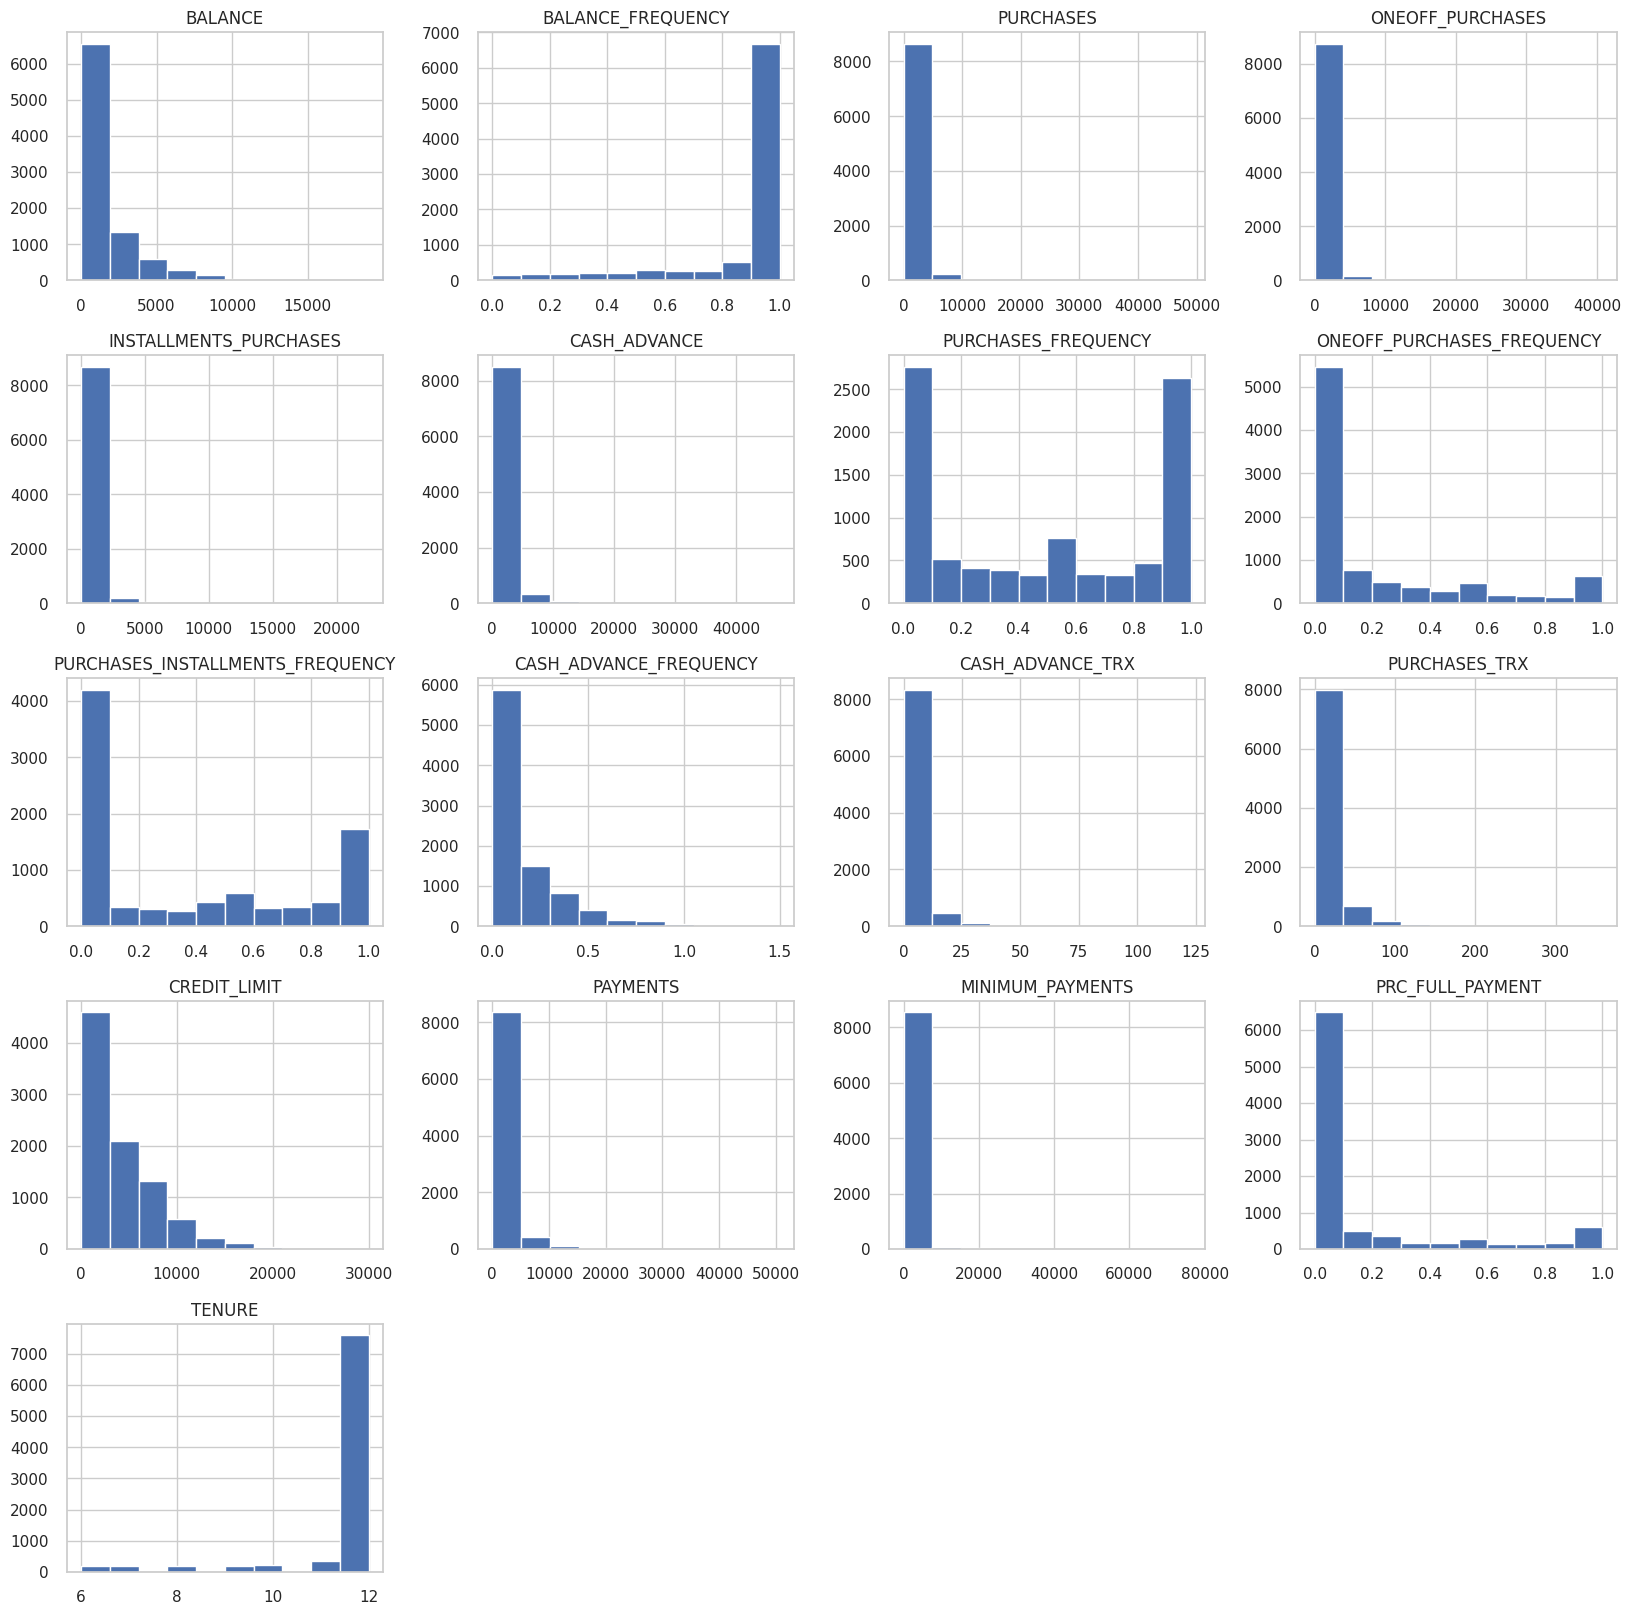

In [ ]:
sns.set(style="whitegrid")
df.hist(figsize=(20,20))
plt.show()

> The above histograms reveal the following information:
1. Most features have distributions that are skewed. This is likely caused by the large number of outliers.
2. Since `PURCHASES_FREQUENCY` feature values ranges between 0 - 1, it looks nearly balanced.

### Dealing with Missing Values

In [ ]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

> There are missing values in `'CREDIT_LIMIT'` and `'MINIMUM_PAYMENTS' `features. Since the disturbution of the feature is skewed, the missing values will be replaced by the **Median** value.

In [ ]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(), inplace=True)

In [ ]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

### Dropping Unnecessary Features

In [ ]:
# drop Customer ID since it has no meaning
df.drop('CUST_ID', axis = 1, inplace = True)

In [ ]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### Statistical Overview

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


### Dealing with Outliers

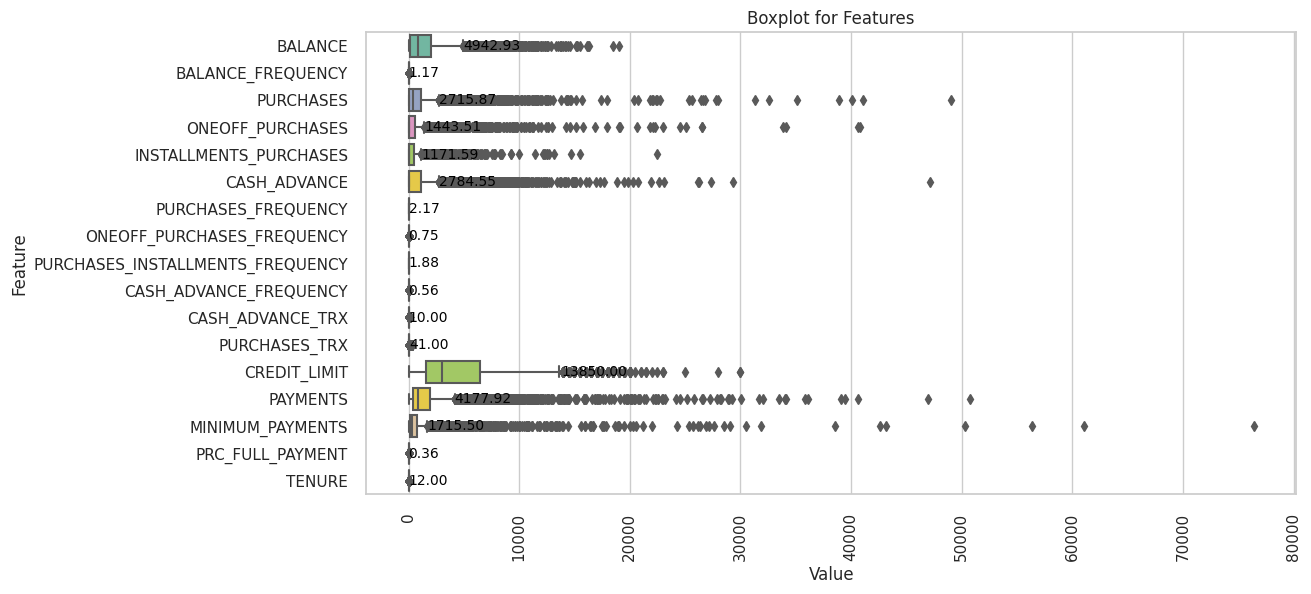

In [ ]:
# Set the style of the plot
sns.set(style="whitegrid")

# Create a boxplot for all features
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
ax = sns.boxplot(data=df, orient="h", palette="Set2")  # "orient" sets the orientation to horizontal

# Rotate the feature labels for better visibility
plt.xticks(rotation=90)

# Add labels and title
plt.xlabel("Value")
plt.ylabel("Feature")
plt.title("Boxplot for Features")

# Get the upper whisker values for each boxplot
all_upper_whisker_values = []
for i in df.columns:
  q1 = df[i].quantile(0.25)
  q3 = df[i].quantile(0.75)
  iqr = q3 - q1
  limit_upper = q3 + 1.5*iqr
  all_upper_whisker_values.append(limit_upper)

# Print the upper whisker values
for i, upper_whisker in enumerate(all_upper_whisker_values):
    # Add labels at the upper whisker positions
    plt.text(upper_whisker + 0.1, i, f"{upper_whisker:.2f}", va="center", fontsize=10, color='black')

# Show the plot
plt.show()

> The dataset contains a large number of outliers. Outliers in bank data can be due a variety of reasons, such as fraudulent transactions, data entry errors, unusual financial behavior, or even system glitches.  
Since the reason for the outliers is unknown. Their impact will be reduced by applying **Square Root Transformation** to normalize the features distribution.

In [ ]:
# Outliers are the values that exceed the upper fence
# Create a dictionary and store only the features that contains outliers & their upper fence
outliers_upper_whisker = {}
for i,j in zip(df.columns,all_upper_whisker_values):
  if len(df[df[i]>j]) != 0:
    outliers_upper_whisker[i] = j

In [ ]:
outliers_upper_whisker

{'BALANCE': 4942.9272155,
 'PURCHASES': 2715.8725000000004,
 'ONEOFF_PURCHASES': 1443.5124999999998,
 'INSTALLMENTS_PURCHASES': 1171.59375,
 'CASH_ADVANCE': 2784.5528481250003,
 'ONEOFF_PURCHASES_FREQUENCY': 0.75,
 'CASH_ADVANCE_FREQUENCY': 0.555555,
 'CASH_ADVANCE_TRX': 10.0,
 'PURCHASES_TRX': 41.0,
 'CREDIT_LIMIT': 13850.0,
 'PAYMENTS': 4177.921542875,
 'MINIMUM_PAYMENTS': 1715.4972705,
 'PRC_FULL_PAYMENT': 0.35714250000000003}

> Apply **Square Root Transformation** to outliers only.

In [ ]:
for i,j in outliers_upper_whisker.items():
  for index, value in df[i].iteritems():
    if value > j:           # if value is an outlier then apply square root
      df.at[index, i] = np.sqrt(value)
    else:
      df.at[index, i] = value

<ipython-input-25-2926f37efd5f>:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in df[i].iteritems():


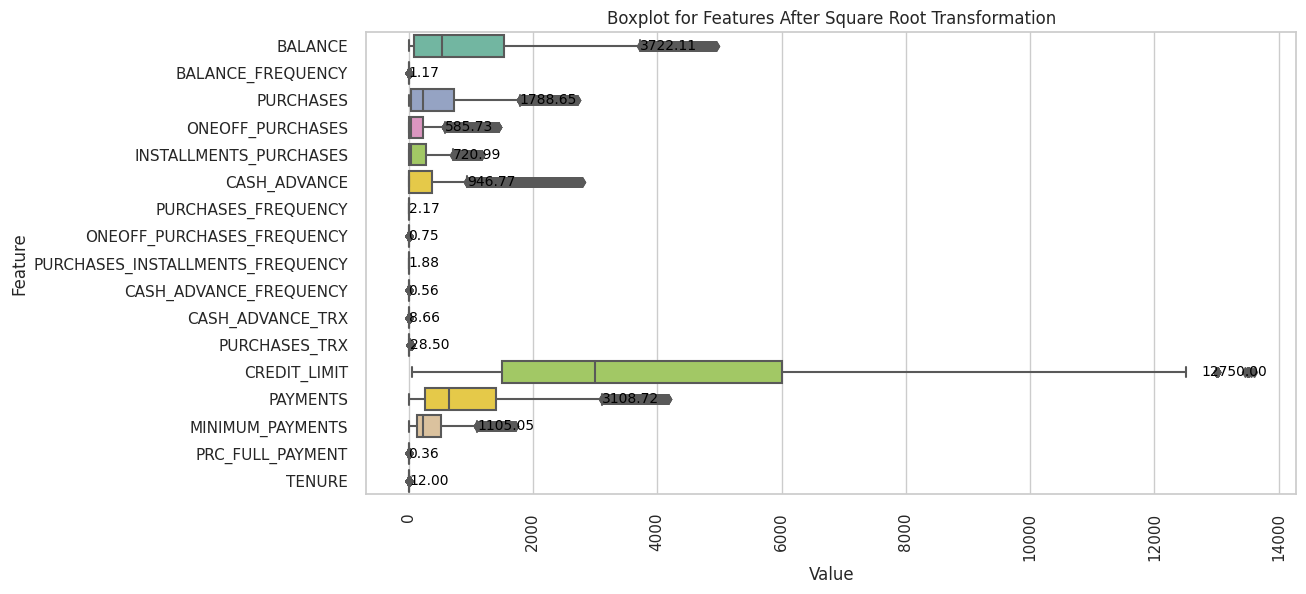

In [ ]:
# Set the style of the plot
sns.set(style="whitegrid")

# Create a boxplot for all features
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
ax = sns.boxplot(data=df, orient="h", palette="Set2")  # "orient" sets the orientation to horizontal

# Rotate the feature labels for better visibility
plt.xticks(rotation=90)

# Get the upper whisker values for each boxplot
all_upper_whisker_values = []
for i in df.columns:
  q1 = df[i].quantile(0.25)
  q3 = df[i].quantile(0.75)
  iqr = q3 - q1
  limit_upper = q3 + 1.5*iqr
  all_upper_whisker_values.append(limit_upper)

# Print the upper whisker values
for i, upper_whisker in enumerate(all_upper_whisker_values):
    # Add labels at the upper whisker positions
    plt.text(upper_whisker + 0.1, i, f"{upper_whisker:.2f}", va="center", fontsize=10, color='black')

# Add labels and title
plt.xlabel("Value")
plt.ylabel("Feature")
plt.title("Boxplot for Features After Square Root Transformation")

# Show the plot
plt.show()

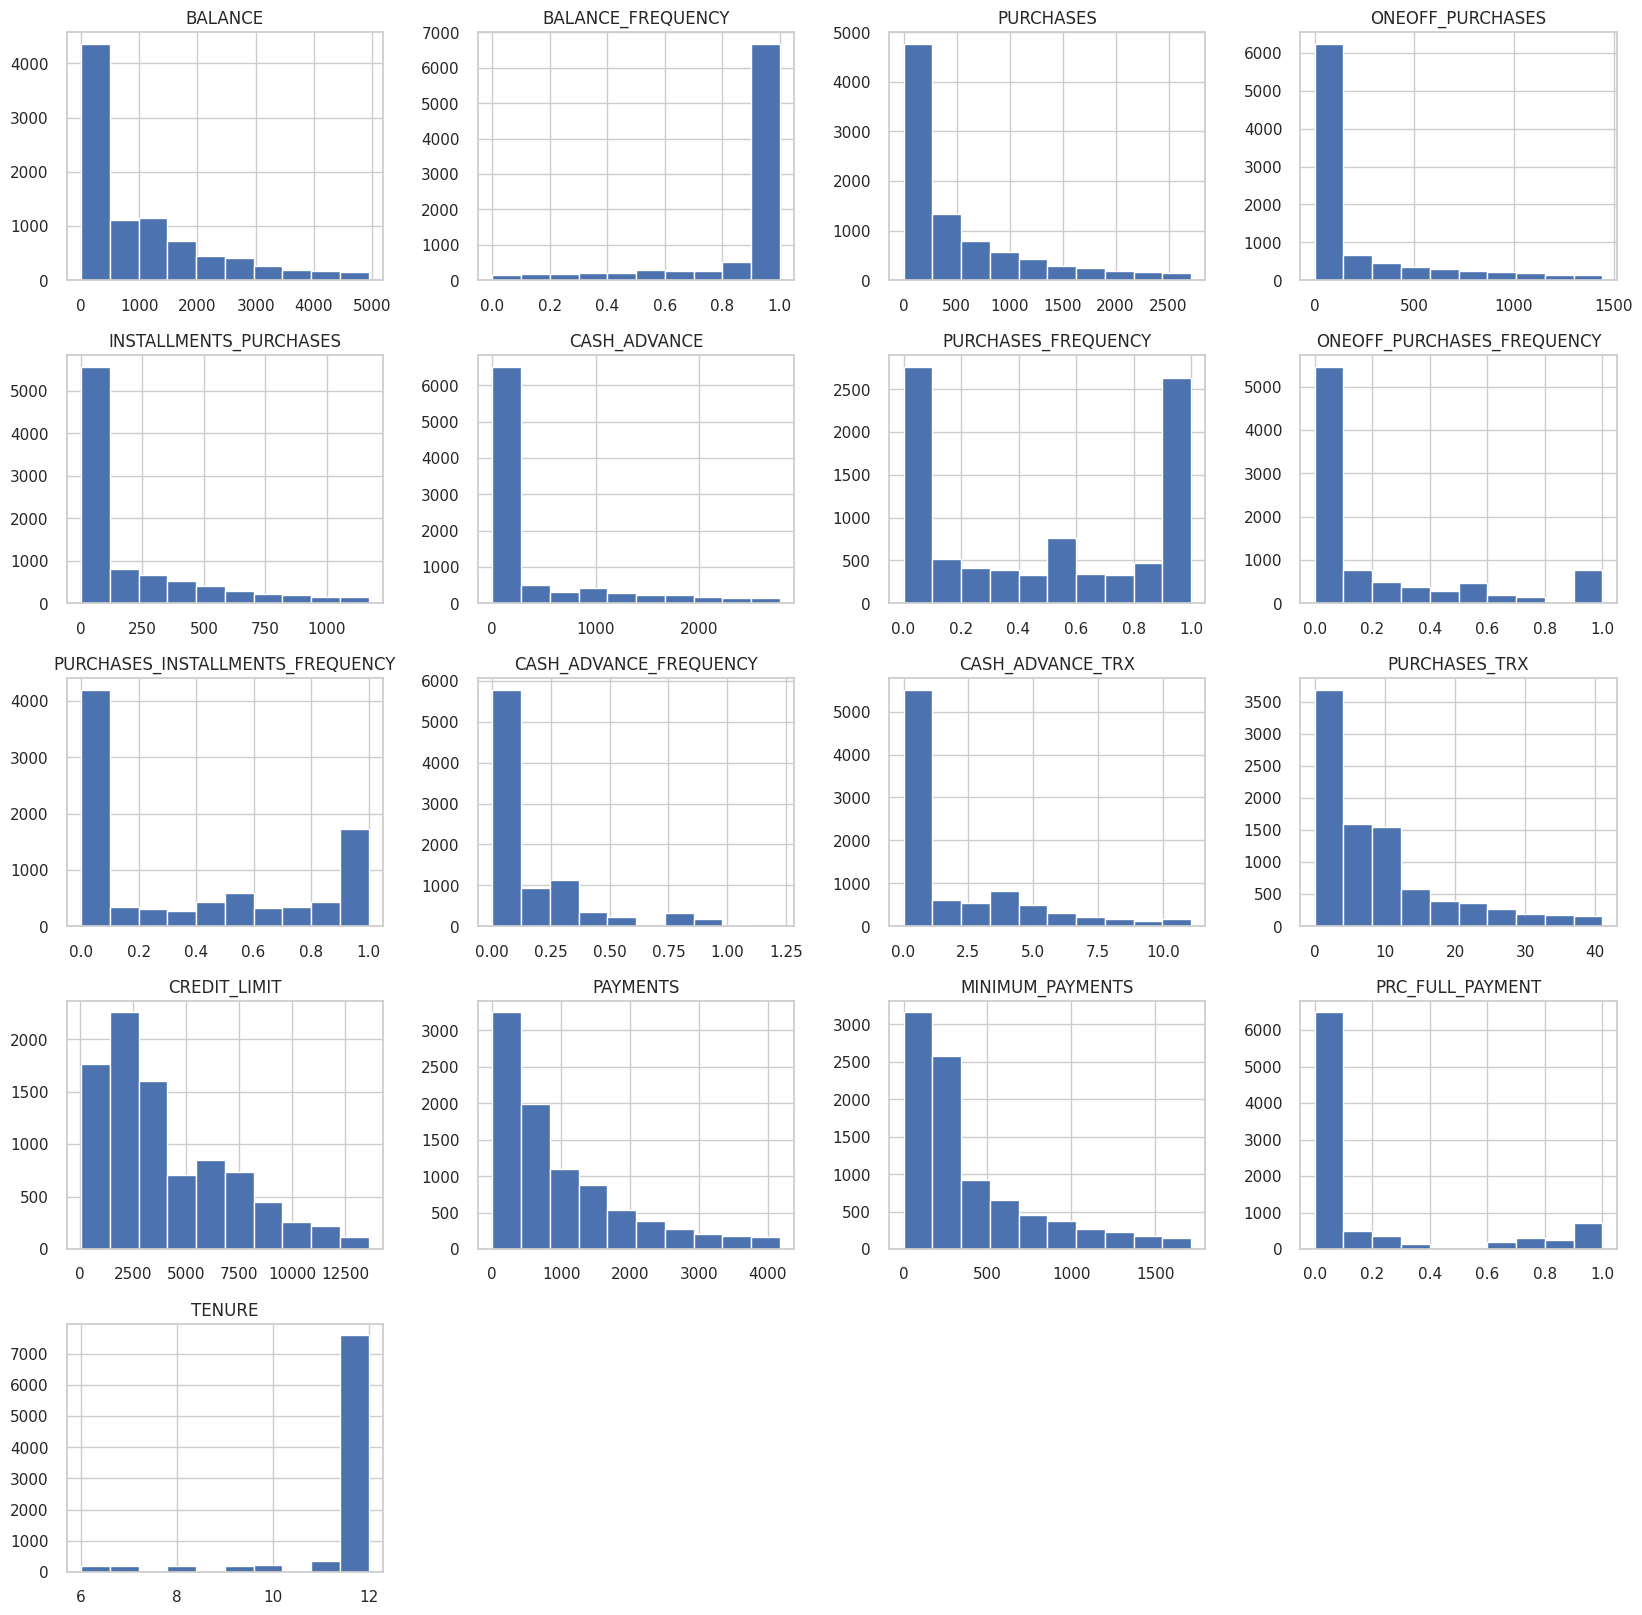

In [ ]:
df.hist(figsize=(20,20))
plt.show()

> After dealing with the outliers, the distribution of some features has slightly improved.

### Scaling the data

In [ ]:
# Use a standard scaler to scale the data
df_scaled = pd.DataFrame(StandardScaler().fit_transform(df), columns = df.columns)

In [ ]:
df_scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.829471,-0.249434,-0.634854,-0.586589,-0.329082,-0.550847,-0.806490,-0.674951,-0.707313,-0.645268,-0.725898,-0.722836,-0.993842,-0.816636,-0.657791,-0.533315,0.36068
1,1.867698,0.134325,-0.785122,-0.586589,-0.673453,-0.428106,-1.221758,-0.674951,-0.916995,0.485178,0.826260,-0.934041,0.968387,3.288425,1.804012,0.162191,0.36068
2,1.264276,0.518084,0.432731,1.712109,-0.673453,-0.550847,1.269843,2.626199,-0.916995,-0.645268,-0.725898,0.333191,1.131906,-0.374413,0.629480,-0.533315,0.36068
3,0.557492,-1.016953,1.576017,-0.471481,-0.673453,-0.236167,-1.014125,-0.399856,-0.916995,-0.268454,-0.337858,-0.828438,1.131906,-1.028982,-0.201670,-0.533315,0.36068
4,-0.166762,0.518084,-0.759920,-0.539020,-0.673453,-0.550847,-1.014125,-0.399856,-0.916995,-0.645268,-0.725898,-0.828438,-0.928434,-0.315205,-0.379946,-0.533315,0.36068


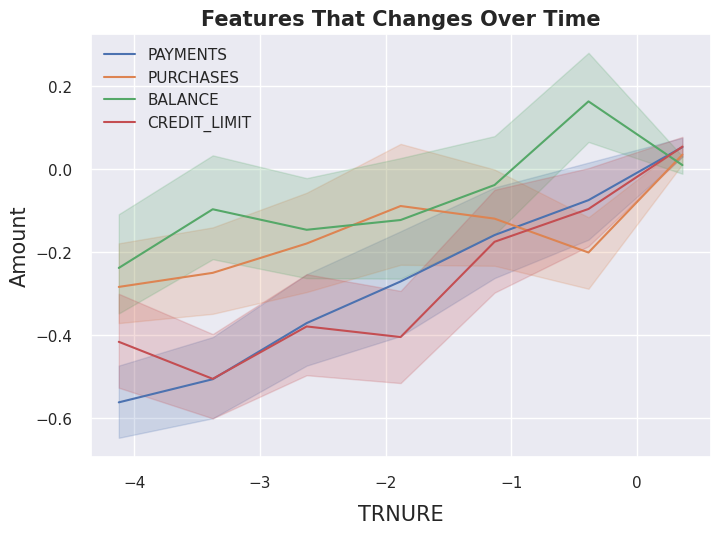

In [ ]:
sns.set(style="darkgrid")

# Create the line plot
sns.lineplot(data=df_scaled, x='TENURE', y='PAYMENTS', label = 'PAYMENTS')
sns.lineplot(data=df_scaled, x='TENURE', y='PURCHASES', label = 'PURCHASES')
sns.lineplot(data=df_scaled, x='TENURE', y='BALANCE', label = 'BALANCE')
sns.lineplot(data=df_scaled, x='TENURE', y='CREDIT_LIMIT', label = 'CREDIT_LIMIT')

# Customize the plot
plt.xlabel("TRNURE", fontsize=15, labelpad=10)
plt.ylabel("Amount", fontsize=15)
plt.title("Features That Changes Over Time", fontweight="bold", fontsize=15)
plt.legend()

# Show the plot
plt.show()

> In general, all the plotted features against `TENURE` have an upward trend. Indicating that they are increasing over time.

### Applying PCA to Visualize Clusters

> To reduce the noise in data and improve the clustering performance, the **Principal Component Analysis (PCA)** will be applied. As a result, the number of features will be reduced to 2 dimensions.

In [ ]:
# Using PCA to transform data to 2 dimensions for visualization
pca = PCA(2)
pca_comp = pca.fit_transform(df_scaled)
pca_comp

array([[-0.99446579, -2.17128489],
       [-2.21349227,  1.98835388],
       [ 1.40182787,  1.73127247],
       ...,
       [ 0.28980018, -2.43325727],
       [-2.04597183, -2.47879199],
       [ 0.73918684, -0.09003605]])

In [ ]:
pca_comp.shape

(8950, 2)

In [ ]:
# Create a dataframe with the two components
# Using PCA to transform data to 2 dimensions for visualization
pca_df = pd.DataFrame(data = pca_comp, columns =['pca1','pca2'])
pca_df

,pca1,pca2
0,-0.994466,-2.171285
1,-2.213492,1.988354
2,1.401828,1.731272
3,-1.005449,-0.545564
4,-1.289165,-1.428322
...,...,...
8945,1.260687,-2.261914
8946,0.731792,-1.605058
8947,0.289800,-2.433257
8948,-2.045972,-2.478792


## **Model Development**

>Before implementing K-means, the optimal number of clusters will be calculated first using the [KElbowVisualizer](https://www.scikit-yb.org/en/latest/api/cluster/elbow.html) , which combines both Elbow Method and Silhouette Score.

### KElbowVisualizer

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

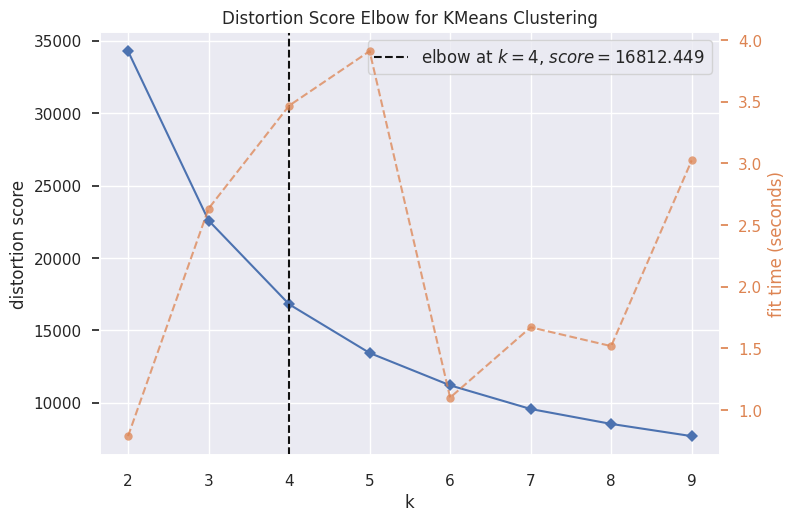

In [ ]:
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10))

visualizer.fit(pca_df);
visualizer.show();

> Based on the above figure, the elbow is located at **k = 4**. Therefore, the model will be created with 4 clusters.

### K-means

In [ ]:
k = 4
kmeans_model = KMeans(n_clusters=k, random_state=42)
kmeans_model.fit(pca_df)
labels = kmeans_model.labels_
centroids = kmeans_model.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
centroids.shape

(4, 2)

In [ ]:
# Create a dataframe for the centroids
clusters = pd.DataFrame(data = centroids, columns = pca_df.columns)

In [ ]:
clusters

,pca1,pca2
0,-0.698709,-1.660243
1,2.251222,-0.261024
2,0.904099,2.190342
3,-2.504329,0.848328


In [ ]:
np.unique(labels)

array([0, 1, 2, 3], dtype=int32)

In [ ]:
labels.shape

(8950,)

In [ ]:
# Add the cluster as a new frature to the original dataFrame
pca_df['Cluster'] = pd.Series(labels, name='Cluster', index=pca_df.index)
pca_df

,pca1,pca2,Cluster
0,-0.994466,-2.171285,0
1,-2.213492,1.988354,3
2,1.401828,1.731272,2
3,-1.005449,-0.545564,0
4,-1.289165,-1.428322,0
...,...,...,...
8945,1.260687,-2.261914,0
8946,0.731792,-1.605058,0
8947,0.289800,-2.433257,0
8948,-2.045972,-2.478792,0


In [ ]:
pca_df.head()

,pca1,pca2,Cluster
0,-0.994466,-2.171285,0
1,-2.213492,1.988354,3
2,1.401828,1.731272,2
3,-1.005449,-0.545564,0
4,-1.289165,-1.428322,0


<ipython-input-44-c8e8b8dbf3a5>:12: UserWarning: The label '_' of <matplotlib.collections.PathCollection object at 0x7f81e3182230> starts with '_'. It is thus excluded from the legend.
  plt.legend(title= "Clusters",


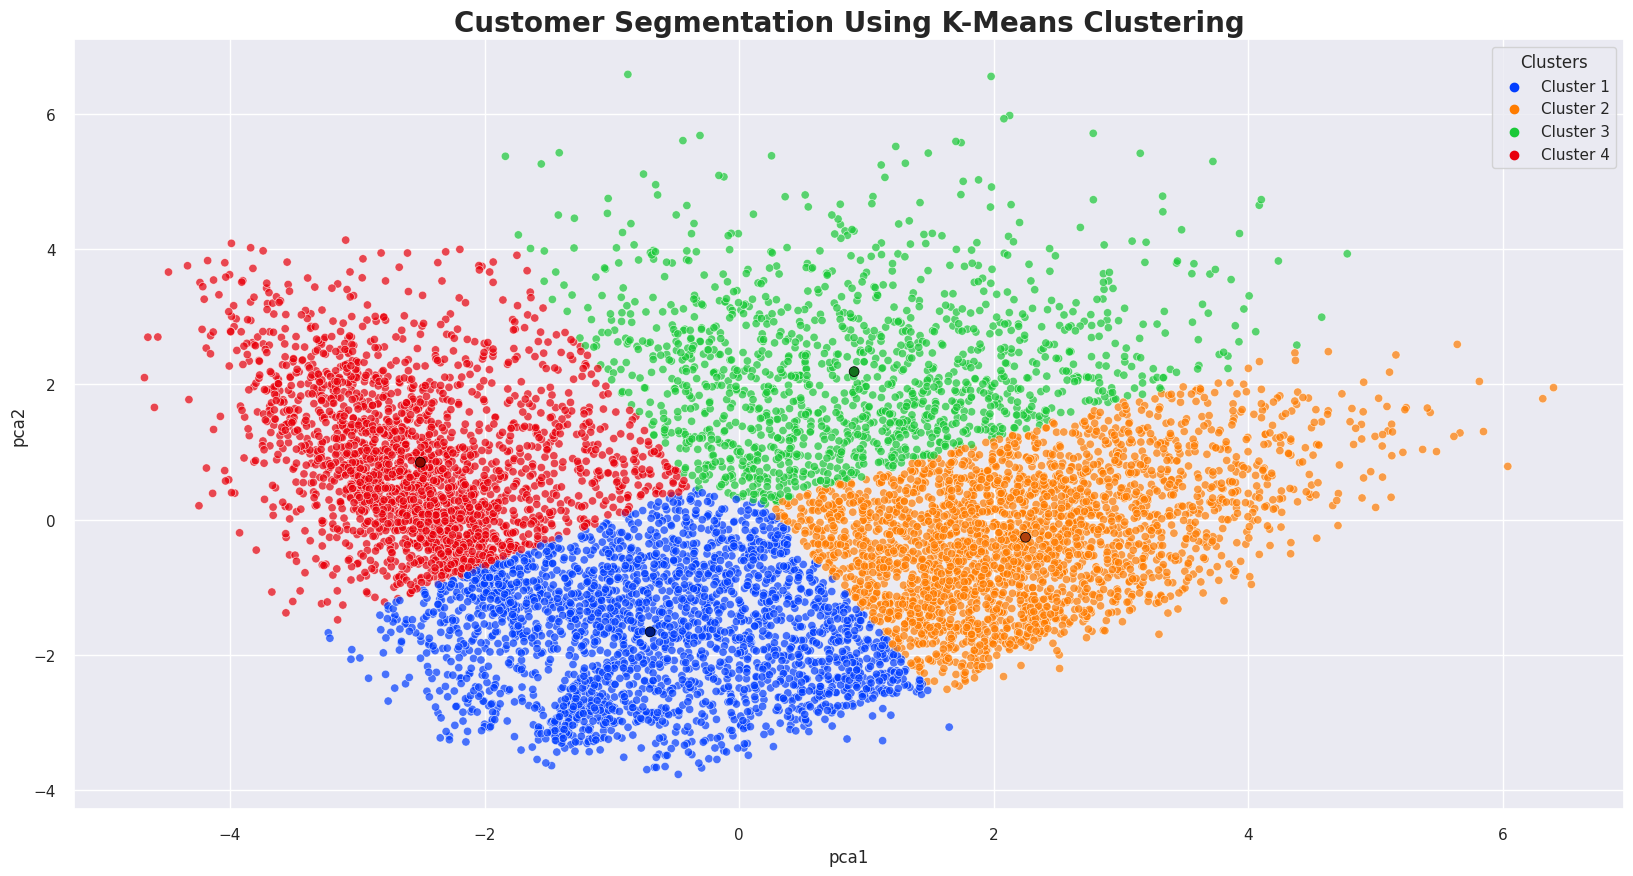

In [ ]:
# Plot the clusters
plt.figure(figsize=(20,10))

ax = sns.scatterplot(x="pca1",
                     y="pca2",
                     alpha = 0.7,
                     hue = "Cluster",
                     data = pca_df,
                     palette = "bright")

# Add a legend for the clusters
plt.legend(title= "Clusters",
           labels= ['_','Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'],
           frameon= True)


# Plot the centriods
ax = sns.scatterplot(x="pca1",
                     y="pca2",
                     hue=range(k),
                     palette="dark",
                     s=50,
                     ec='black',
                     data = clusters,
                     legend=False,
                     ax=ax)
# Add a title
plt.title("Customer Segmentation Using K-Means Clustering", fontweight="bold", fontsize=20)


plt.show()

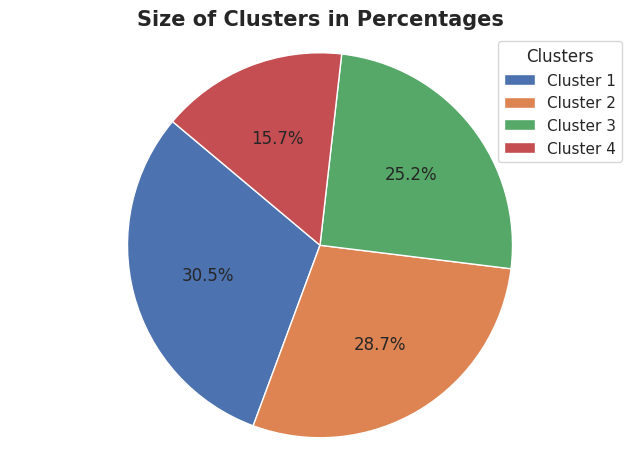

In [ ]:
sns.set(style="whitegrid")

# Number of datapoints in each cluster
clusters_size = list(pca_df['Cluster'].value_counts().values)

# Labels for each slice of the pie chart
clusters_labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']

# Create a pie chart
plt.pie(clusters_size, autopct='%1.1f%%', startangle=140)

# Aspect ratio ensures that the pie chart is drawn as a circle
plt.axis('equal')

# Add a legend
plt.legend(clusters_labels, title="Clusters", loc="upper right", frameon= True)

# Title for the pie chart
plt.title("Size of Clusters in Percentages", fontweight="bold", fontsize=15)

# Display the pie chart
plt.show()

In [ ]:
list(pca_df['Cluster'].value_counts().values)

[2727, 2568, 2251, 1404]

> The clusters are very close in size, with the exception of **Cluster 4**, which is the smallest cluster.



## **Clusters Analysis**

In [ ]:
# Add the cluster as a new frature to the original dataFrame
df['Cluster'] = pd.Series(labels, name='Cluster', index=df.index)
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.000000,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.000000,0.00,80.267961,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.170000,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,38.716921,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,312.343947,0.000000,12,0
4,817.714335,1.000000,16.00,16.000000,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.000000,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0.0,6.0,1000.0,325.594462,48.886365,0.707107,6,0
8946,19.183215,1.000000,300.00,0.000000,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0.0,6.0,1000.0,275.861322,312.343947,0.000000,6,0
8947,23.398673,0.833333,144.40,0.000000,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0.0,5.0,1000.0,81.270775,82.418369,0.250000,6,0
8948,13.457564,0.833333,0.00,0.000000,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2.0,0.0,500.0,52.549959,55.755628,0.250000,6,0


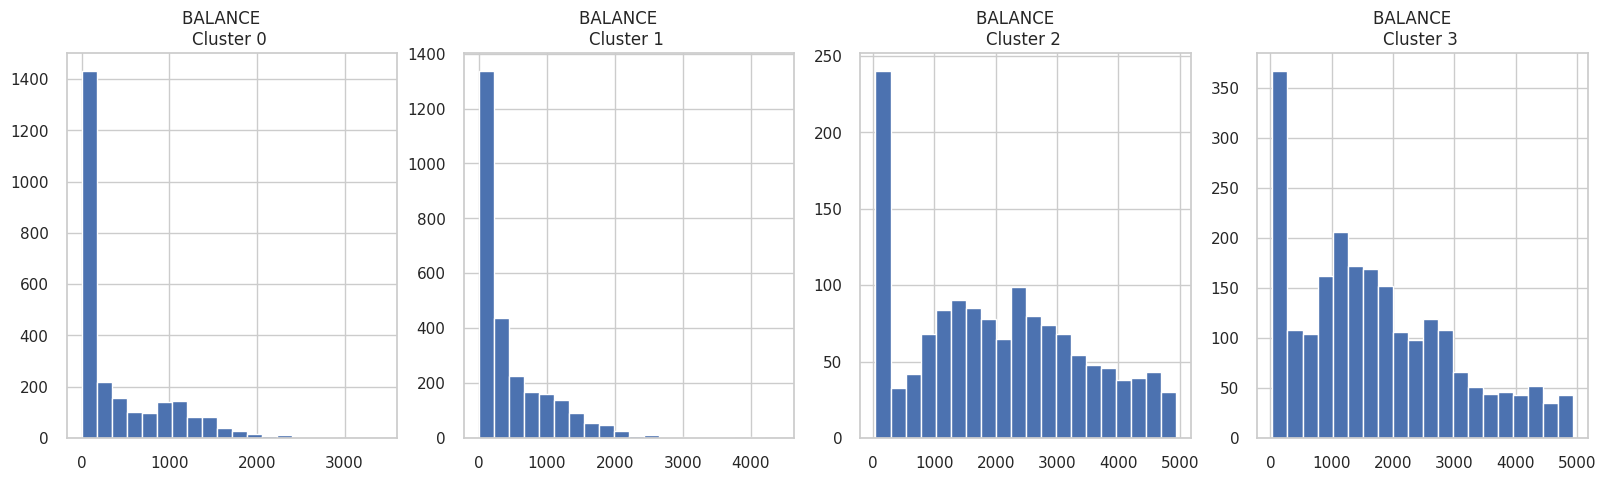

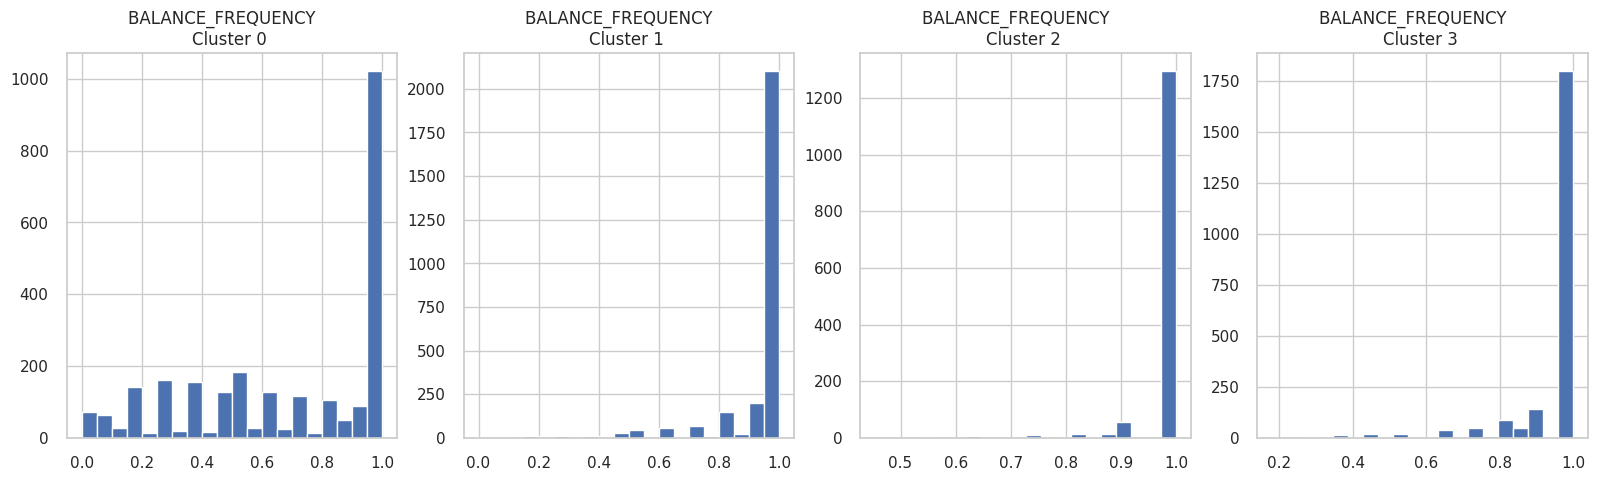

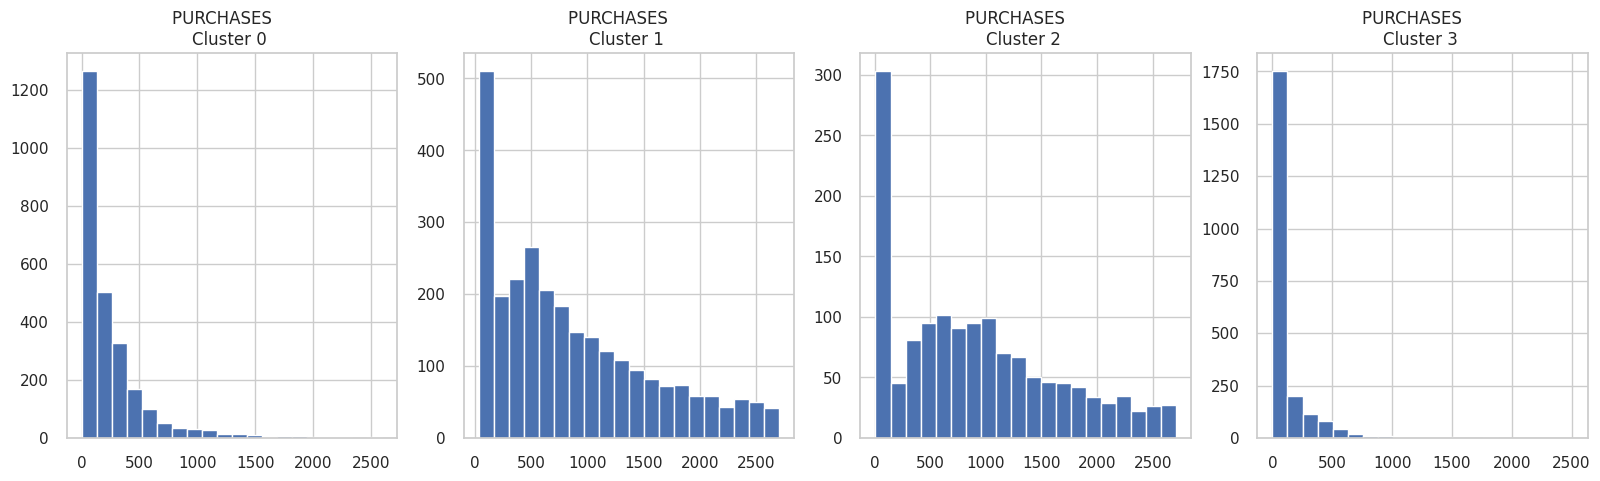

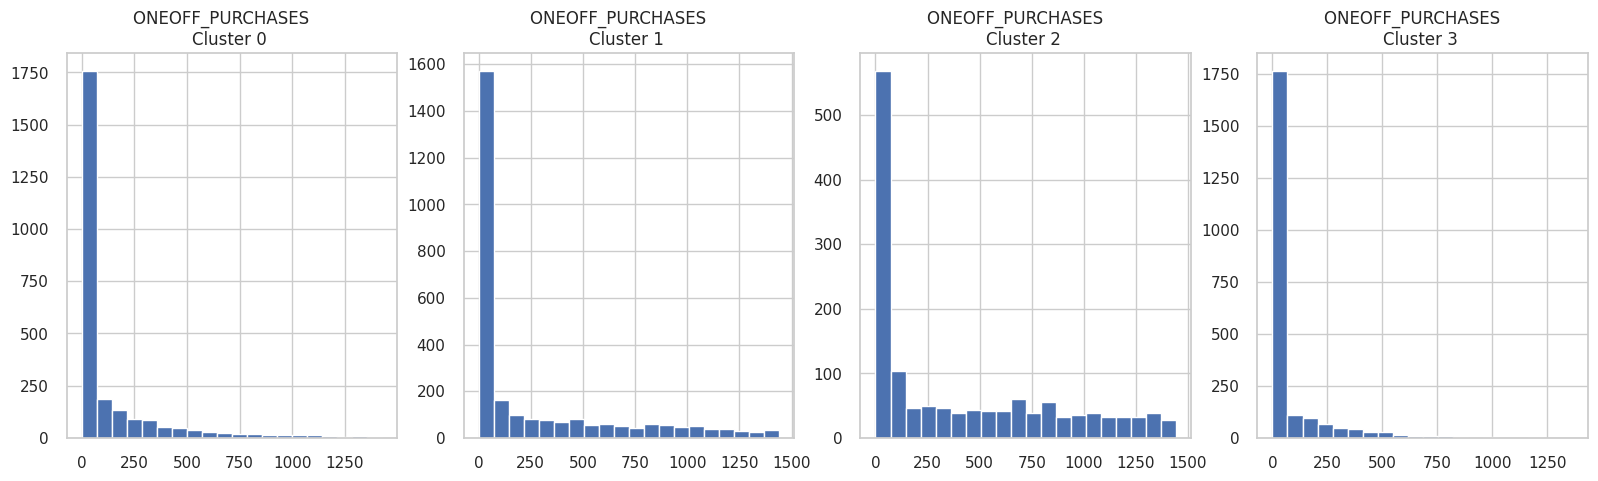

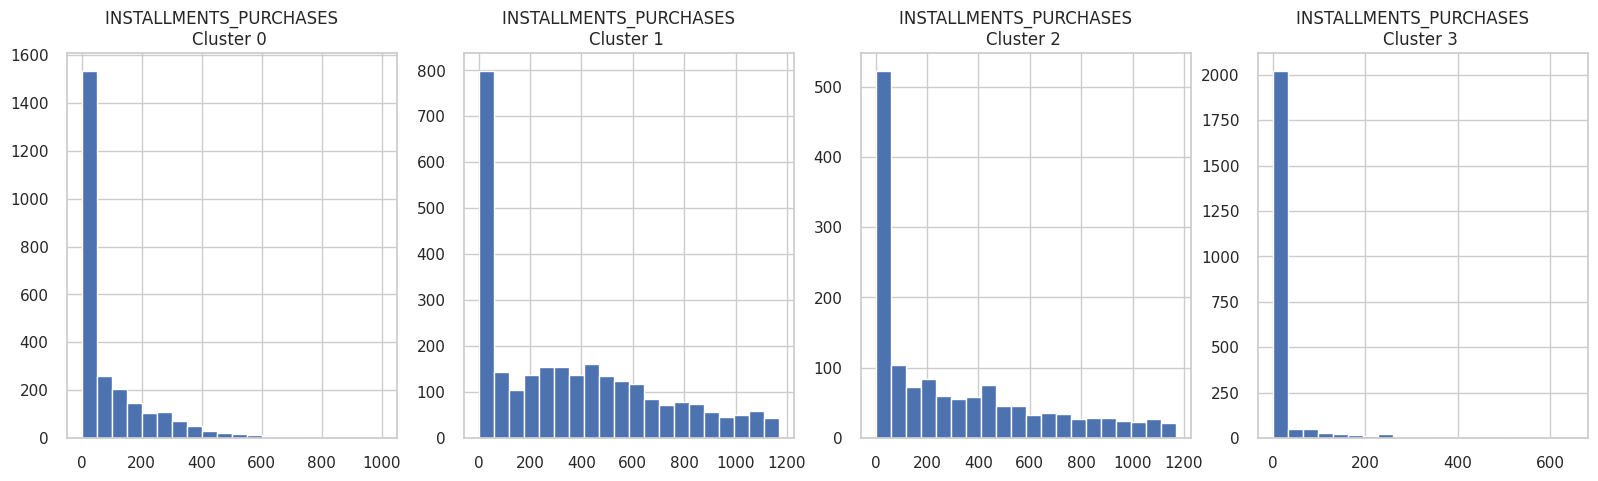

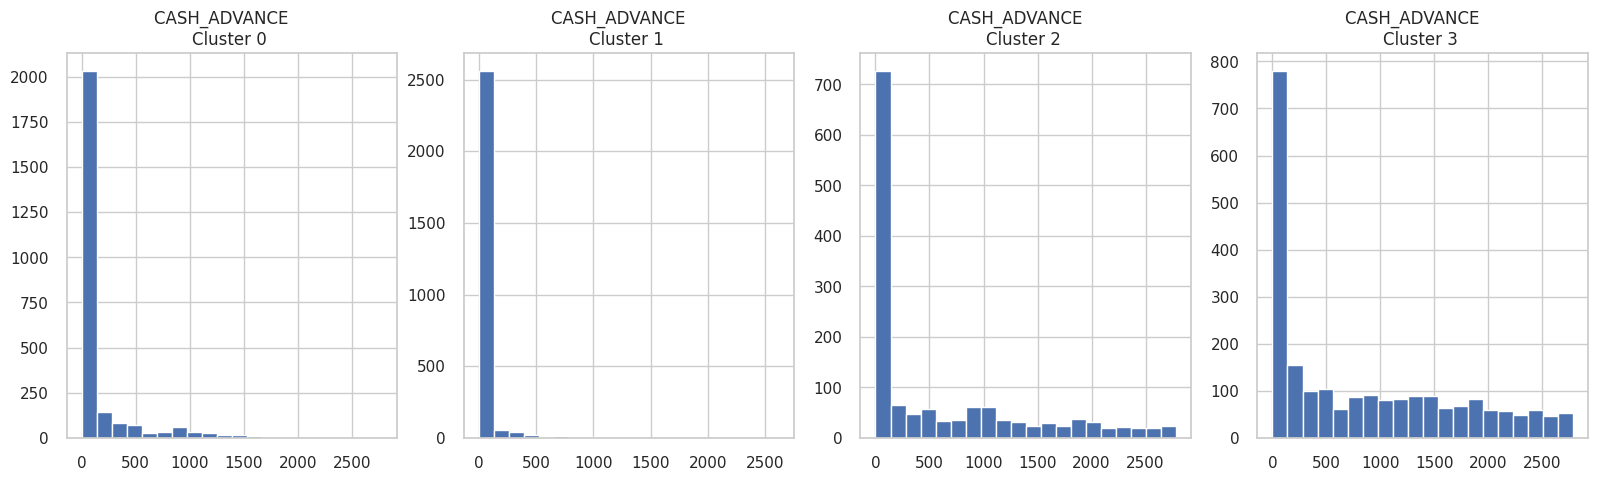

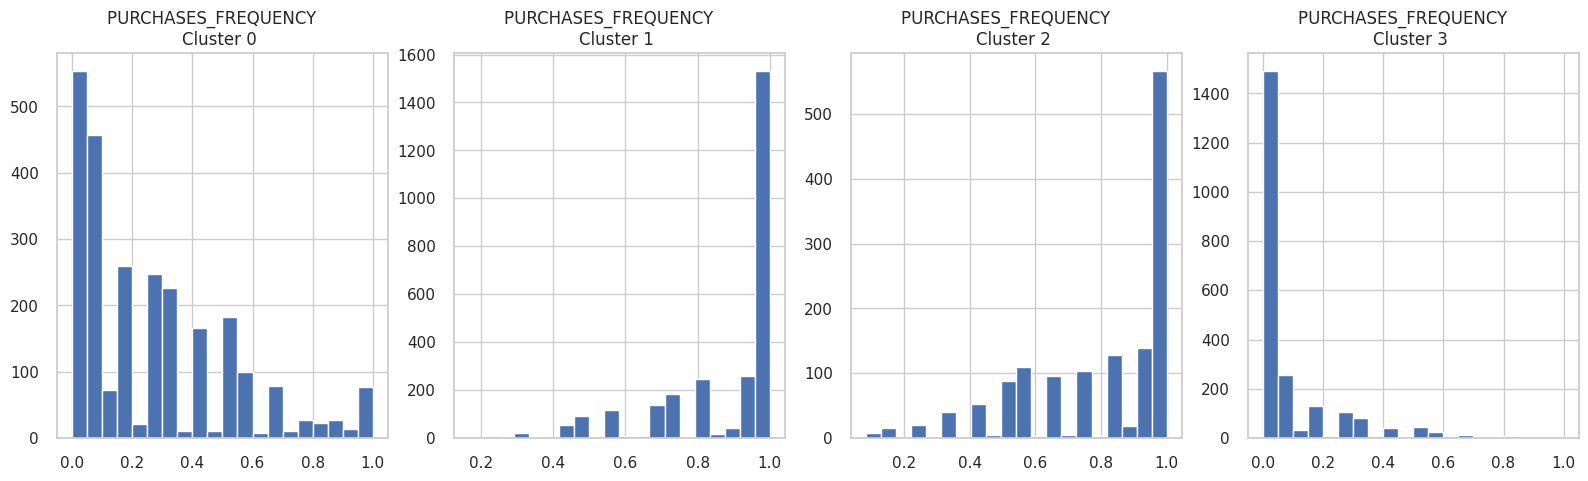

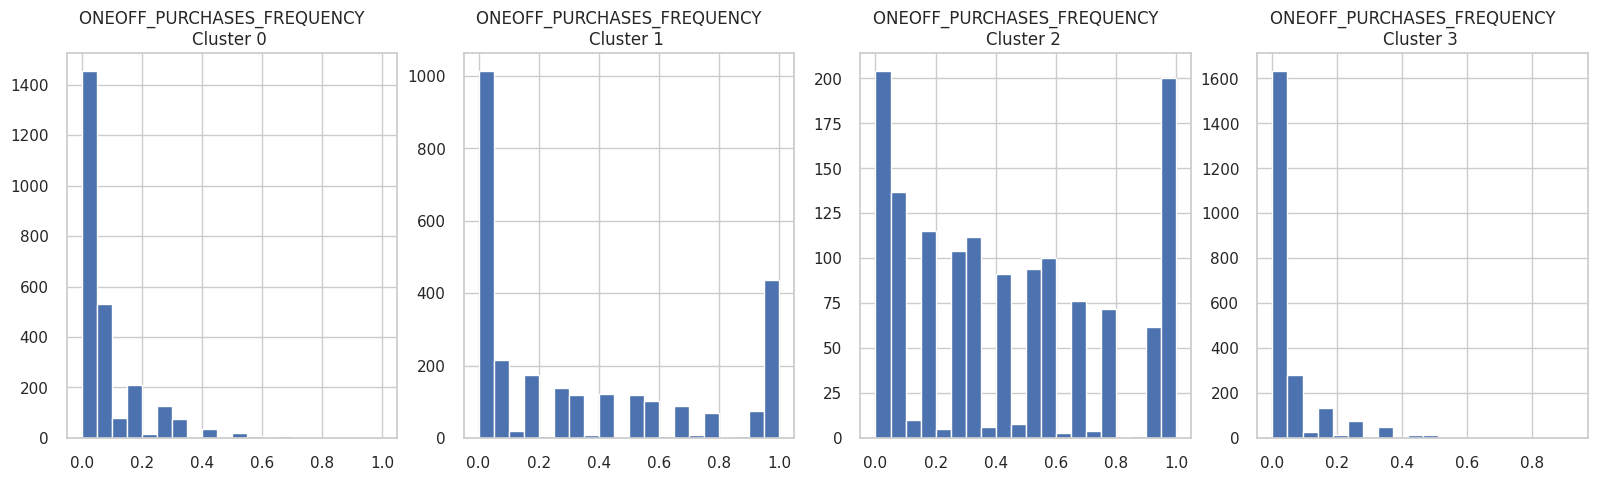

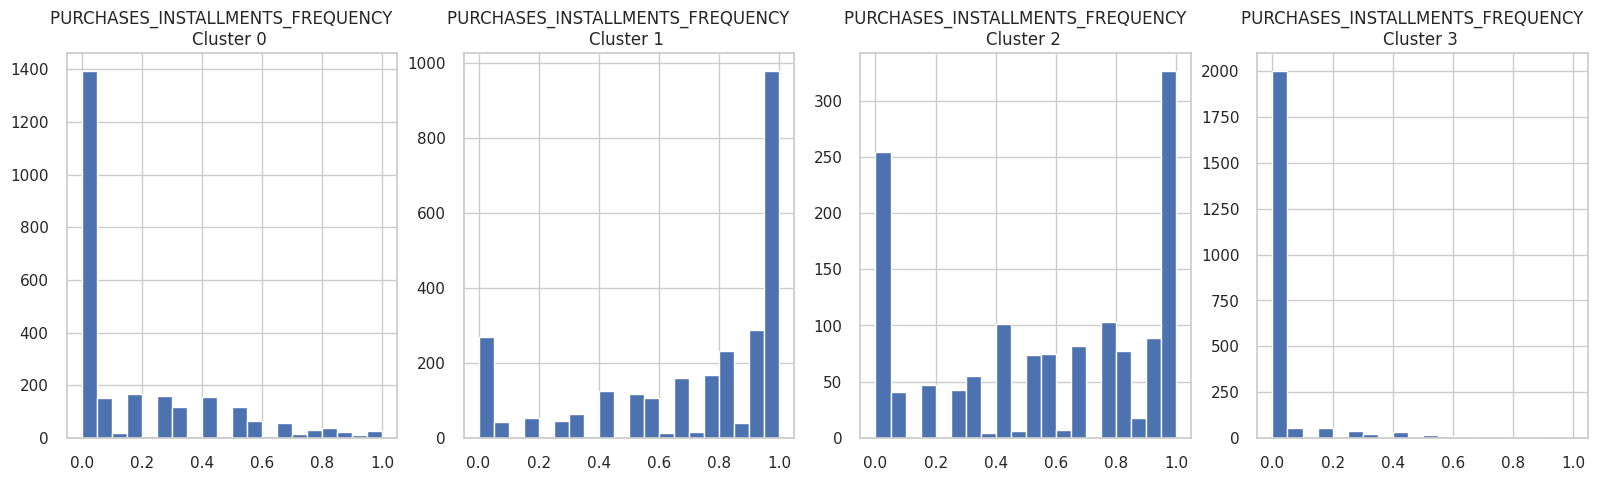

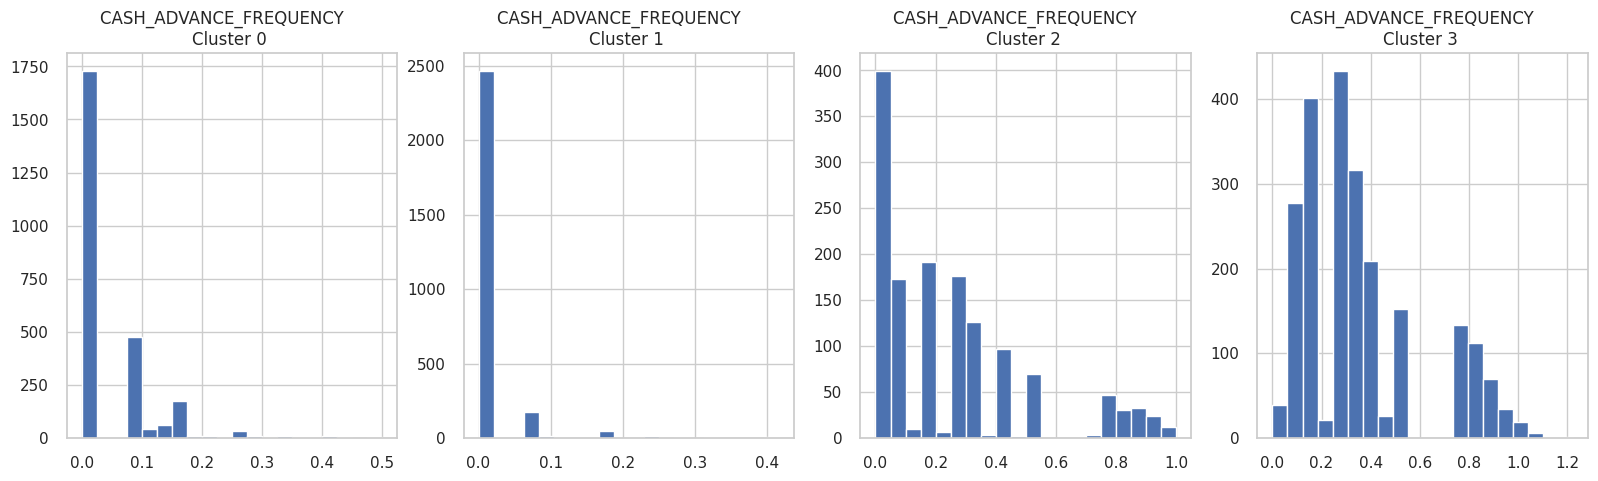

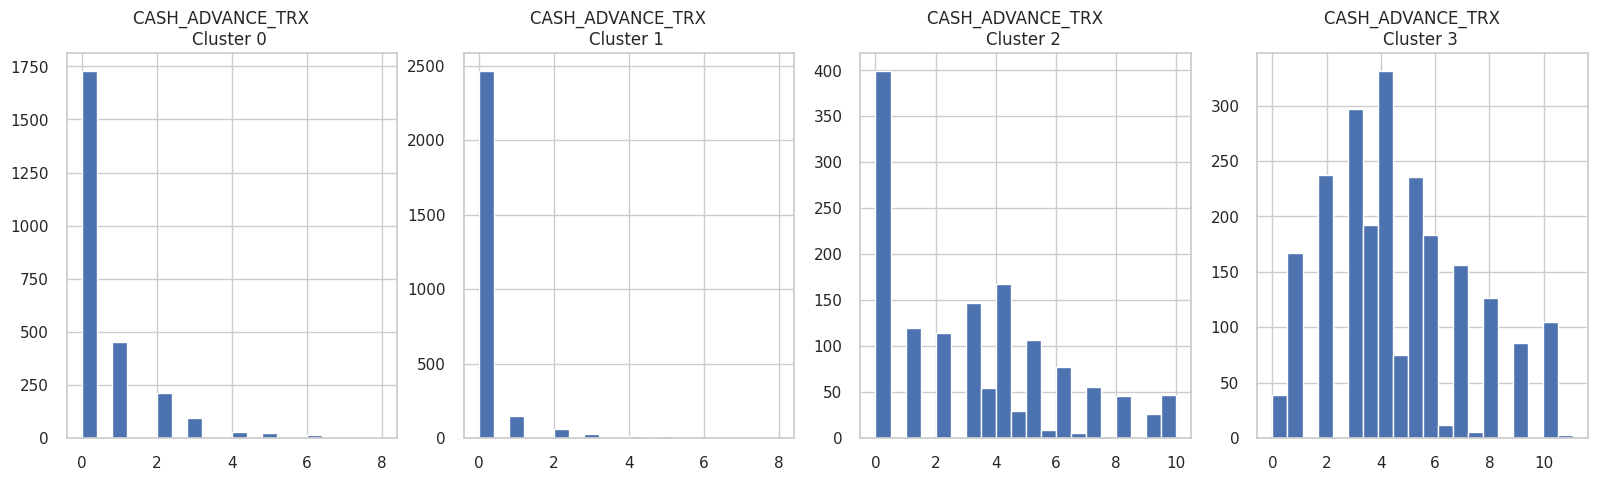

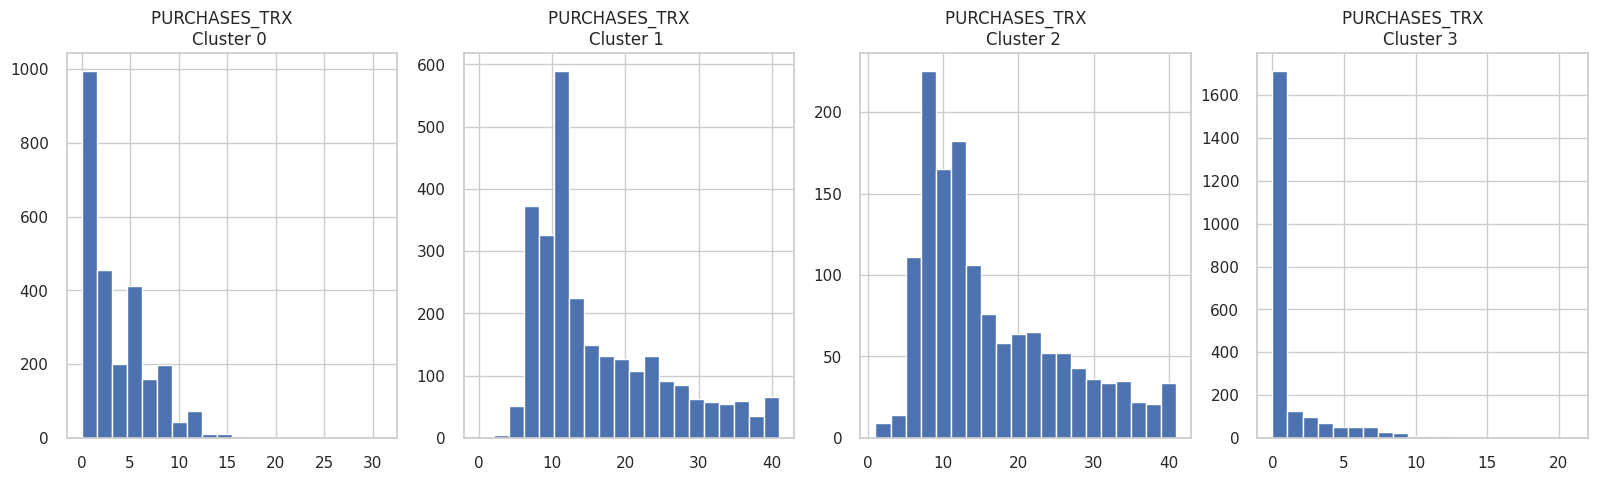

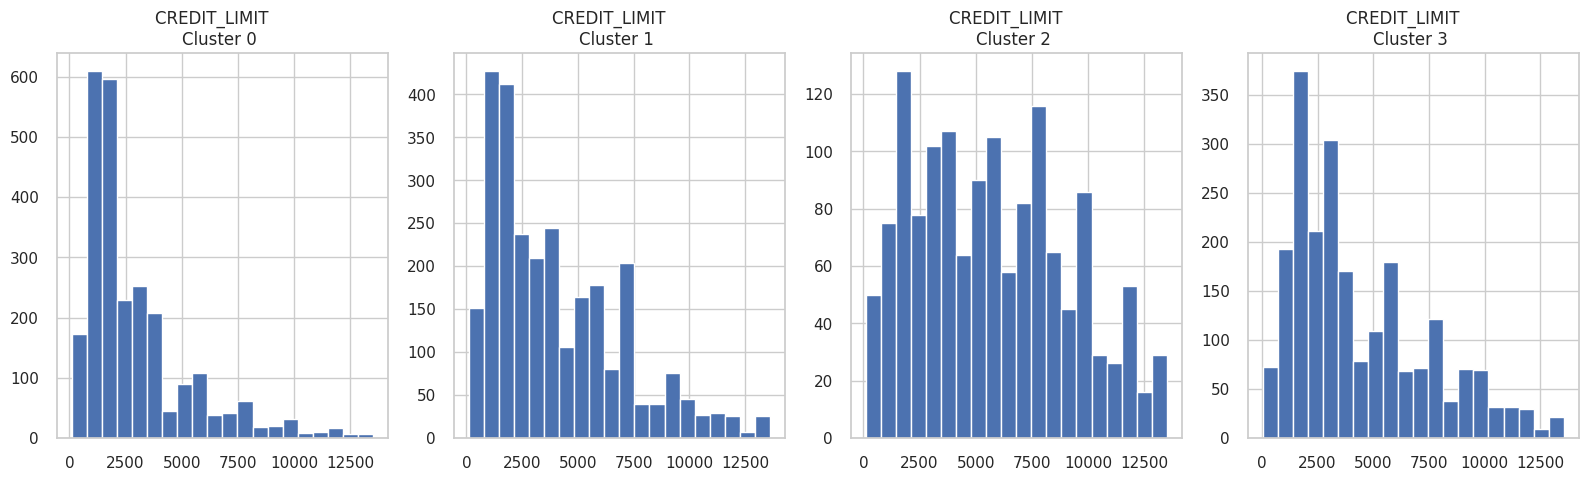

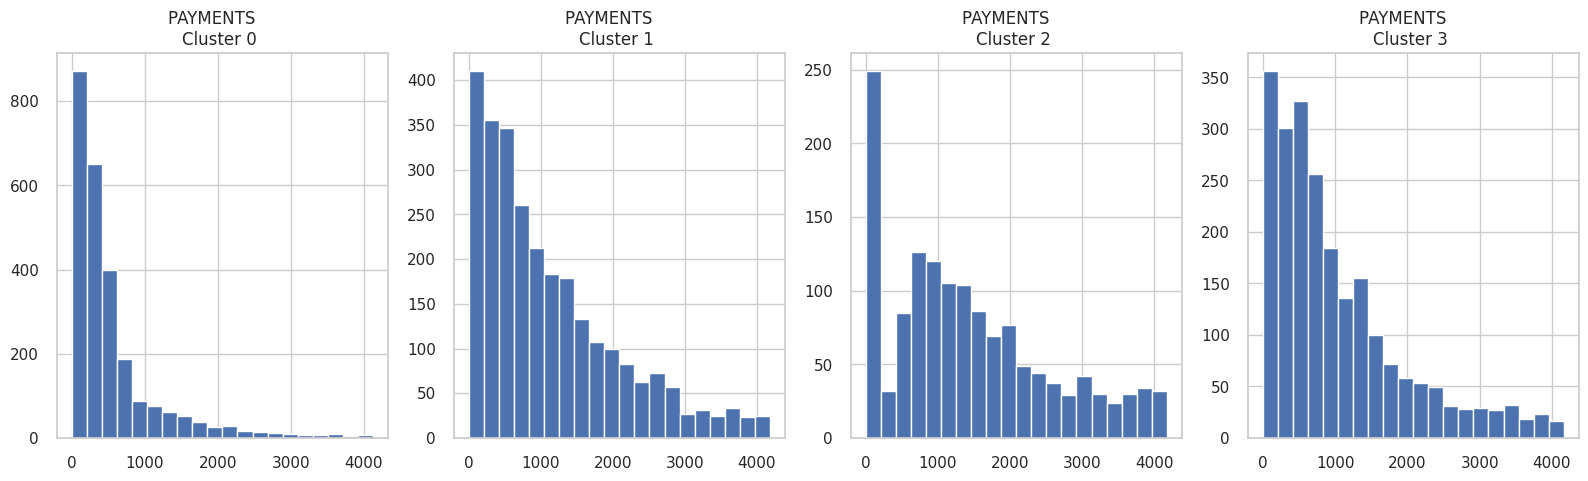

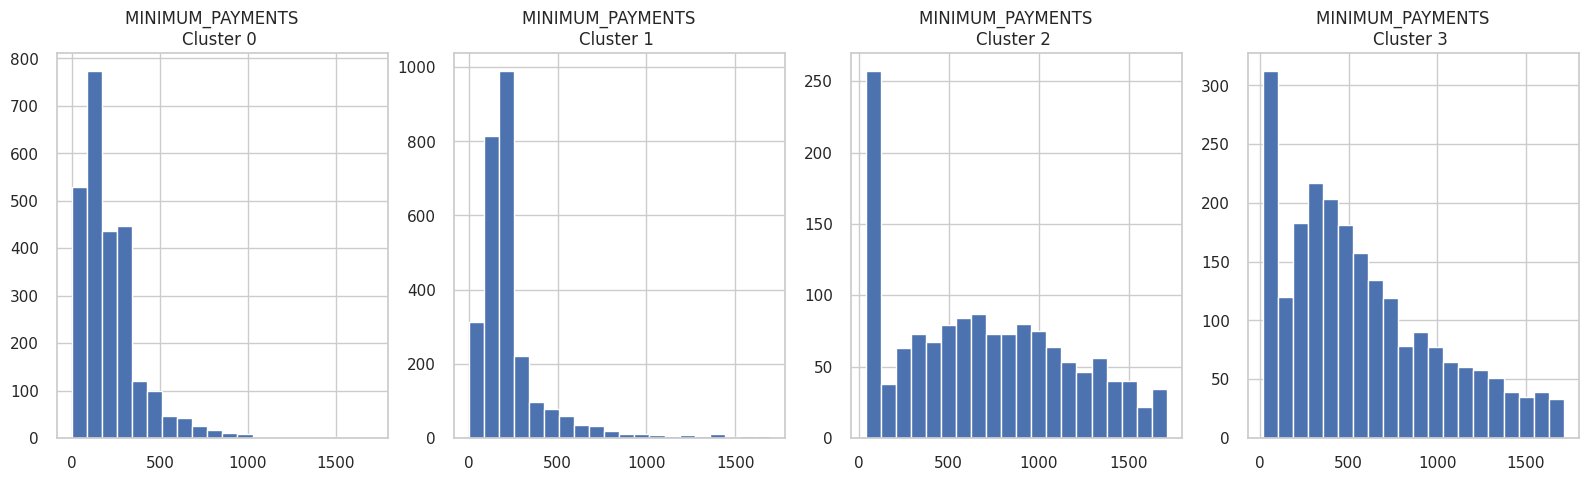

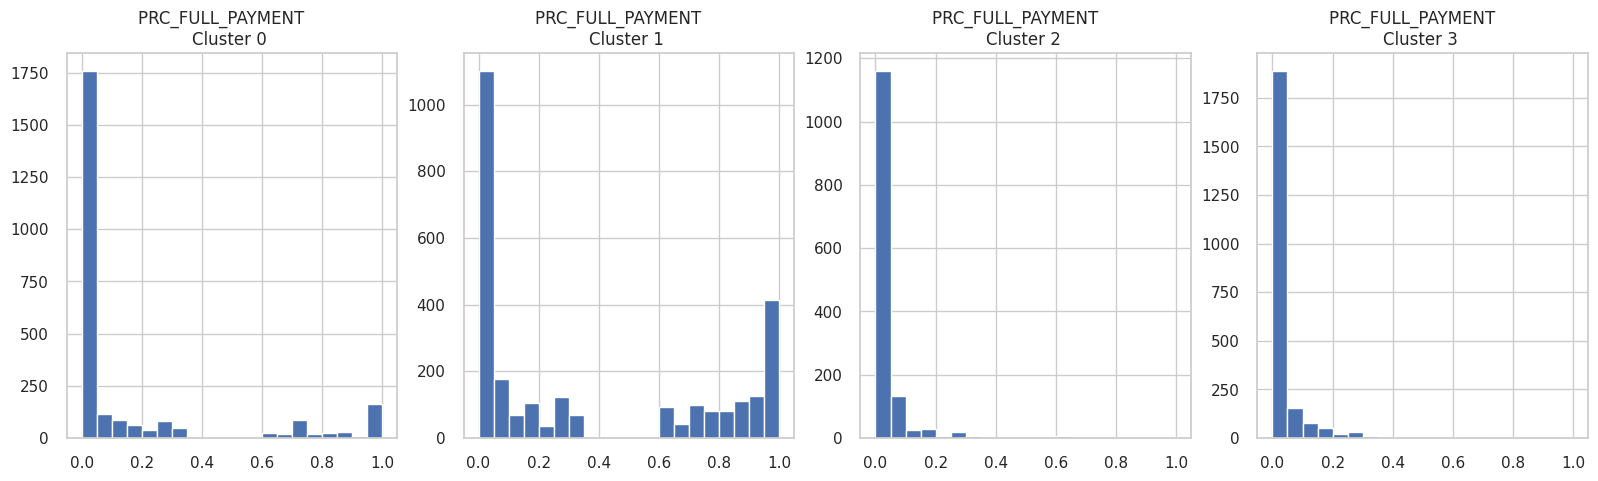

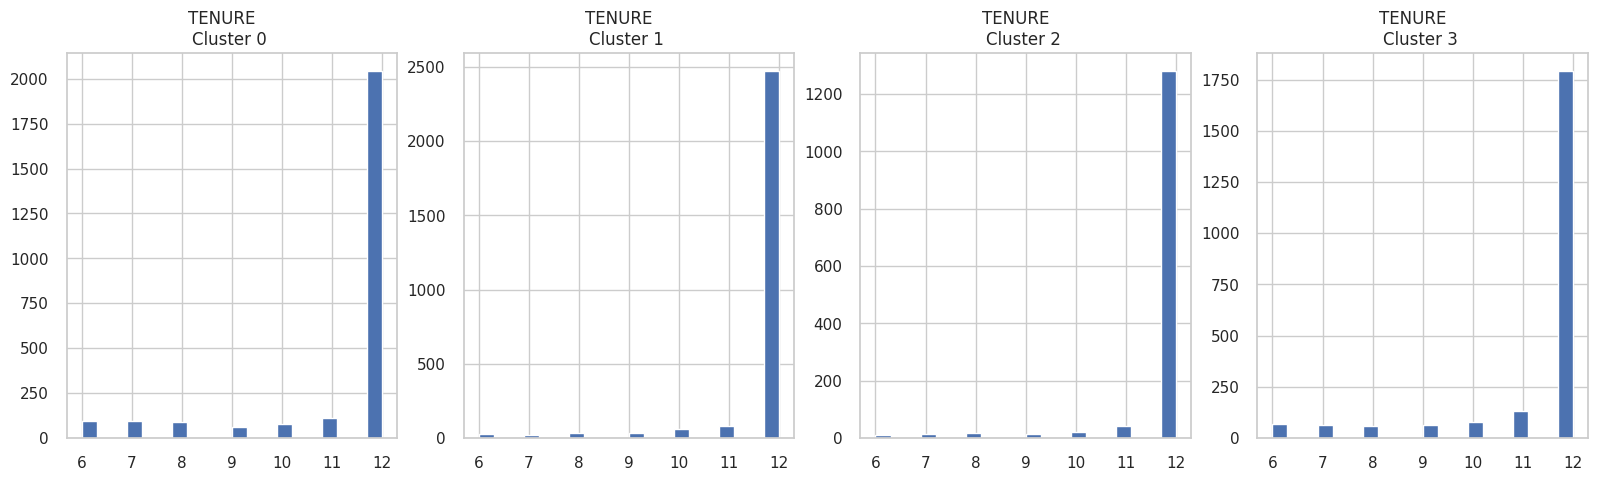

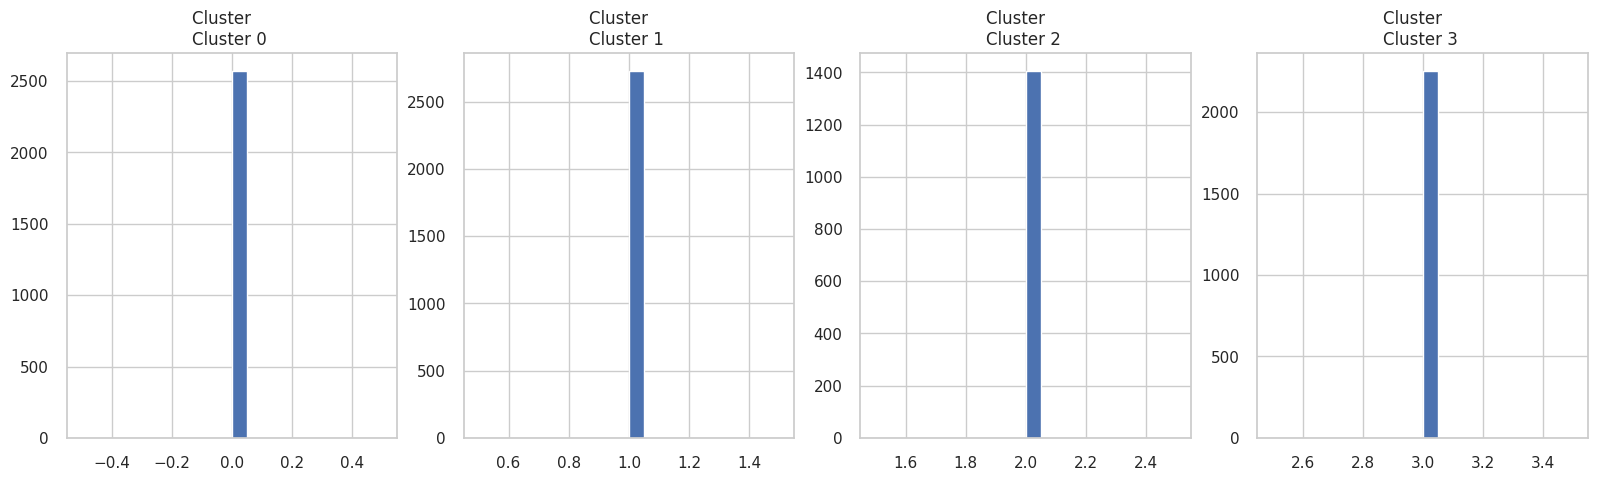

In [ ]:
# Plot the histogram of the features across clusters
for i in df.columns:
  plt.figure(figsize = (35, 5))
  for j in range(len(clusters)):
    plt.subplot(1, 7, j+1)
    cluster = df[df['Cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))

  plt.show()

In [ ]:
# Print the descriptive statistics of the features across clusters
for i in df.columns[:-1]:
  print(i)
  display(df.groupby('Cluster').describe()[i])
  print('/////////////////////////////////////////////////////////////')

BALANCE


,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,2568.0,407.629556,543.061294,0.000000,18.907737,107.715956,729.704650,3430.981532
1,2727.0,485.586232,588.889375,0.000000,80.657562,227.636073,722.930803,4414.952906
2,1404.0,2013.613914,1380.781305,42.585012,902.413167,1955.814600,3021.208735,4940.113918
3,2251.0,1719.212671,1280.973448,32.215585,724.936252,1519.317855,2586.445710,4936.913341


/////////////////////////////////////////////////////////////
BALANCE_FREQUENCY


,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,2568.0,0.682998,0.326351,0.000000,0.363636,0.727273,1.0,1.0
1,2727.0,0.941801,0.140838,0.000000,1.000000,1.000000,1.0,1.0
2,1404.0,0.987733,0.050316,0.454545,1.000000,1.000000,1.0,1.0
3,2251.0,0.951828,0.121667,0.181818,1.000000,1.000000,1.0,1.0


/////////////////////////////////////////////////////////////
PURCHASES


,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,2568.0,235.608661,315.298800,0.0,29.2175,133.395,315.325,2600.00
1,2727.0,862.215085,704.284941,33.4,290.0000,675.000,1294.695,2703.95
2,1404.0,912.518543,725.397279,8.4,282.2025,793.600,1368.955,2711.90
3,2251.0,99.334995,234.907685,0.0,0.0000,0.000,94.540,2513.46


/////////////////////////////////////////////////////////////
ONEOFF_PURCHASES


,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,2568.0,125.753298,245.263297,0.0,0.000000,0.000000,130.000000,1427.83
1,2727.0,261.223930,382.633337,0.0,0.000000,50.655404,421.120000,1440.48
2,1404.0,409.527551,440.661232,0.0,45.014164,196.025000,739.580000,1443.33
3,2251.0,69.110095,166.072748,0.0,0.000000,0.000000,41.192692,1368.00


/////////////////////////////////////////////////////////////
INSTALLMENTS_PURCHASES


,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,2568.0,85.090988,132.721829,0.0,0.000000,0.000,133.145,1002.00
1,2727.0,363.235428,325.266497,0.0,47.466825,300.260,582.250,1170.38
2,1404.0,302.722550,326.018623,0.0,38.060803,177.895,493.500,1170.49
3,2251.0,15.847034,59.638021,0.0,0.000000,0.000,0.000,649.50


/////////////////////////////////////////////////////////////
CASH_ADVANCE


,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,2568.0,145.649670,341.056709,0.0,0.000000,0.000000,78.815187,2777.200448
1,2727.0,33.774875,157.344400,0.0,0.000000,0.000000,0.000000,2621.049473
2,1404.0,597.463705,779.162291,0.0,0.000000,104.009740,1029.615174,2784.294727
3,2251.0,852.558235,836.998493,0.0,78.626381,540.251858,1483.784927,2784.274703


/////////////////////////////////////////////////////////////
PURCHASES_FREQUENCY


,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,2568.0,0.263285,0.257321,0.000000,0.083333,0.166667,0.416667,1.0
1,2727.0,0.883054,0.172278,0.166667,0.833333,1.000000,1.000000,1.0
2,1404.0,0.797692,0.230268,0.083333,0.659091,0.909091,1.000000,1.0
3,2251.0,0.081953,0.156899,0.000000,0.000000,0.000000,0.083333,1.0


/////////////////////////////////////////////////////////////
ONEOFF_PURCHASES_FREQUENCY


,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,2568.0,0.073674,0.116399,0.0,0.000000,0.000000,0.083333,1.00000
1,2727.0,0.338770,0.374250,0.0,0.000000,0.166667,0.636364,1.00000
2,1404.0,0.434625,0.337255,0.0,0.160715,0.416667,0.666667,1.00000
3,2251.0,0.047391,0.099063,0.0,0.000000,0.000000,0.083333,0.92582


/////////////////////////////////////////////////////////////
PURCHASES_INSTALLMENTS_FREQUENCY


,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,2568.0,0.176605,0.251060,0.0,0.00,0.000000,0.333333,1.0
1,2727.0,0.712589,0.334902,0.0,0.50,0.833333,1.000000,1.0
2,1404.0,0.563911,0.370452,0.0,0.25,0.612500,0.916667,1.0
3,2251.0,0.032533,0.112667,0.0,0.00,0.000000,0.000000,1.0


/////////////////////////////////////////////////////////////
CASH_ADVANCE_FREQUENCY


,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,2568.0,0.041533,0.071259,0.0,0.000000,0.000000,0.083333,0.500000
1,2727.0,0.011503,0.040621,0.0,0.000000,0.000000,0.000000,0.416667
2,1404.0,0.241103,0.255804,0.0,0.000000,0.166667,0.333333,1.000000
3,2251.0,0.355686,0.248962,0.0,0.166667,0.272727,0.428571,1.224745


/////////////////////////////////////////////////////////////
CASH_ADVANCE_TRX


,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,2568.0,0.606057,1.115769,0.0,0.0,0.0,1.0,8.000000
1,2727.0,0.179637,0.673359,0.0,0.0,0.0,0.0,8.000000
2,1404.0,3.126914,2.812286,0.0,0.0,3.0,5.0,10.000000
3,2251.0,4.578488,2.429934,0.0,3.0,4.0,6.0,11.090537


/////////////////////////////////////////////////////////////
PURCHASES_TRX


,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,2568.0,3.604177,3.510263,0.0,1.000000,3.000000,6.0,31.0
1,2727.0,16.394602,8.791250,0.0,10.000000,13.000000,22.0,41.0
2,1404.0,15.945902,9.266791,1.0,8.817562,12.206281,22.0,41.0
3,2251.0,1.248274,2.412700,0.0,0.000000,0.000000,1.0,21.0


/////////////////////////////////////////////////////////////
CREDIT_LIMIT


,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,2568.0,2877.542794,2407.208863,118.321596,1200.0,2000.0,4000.0,13500.0
1,2727.0,3987.782964,2993.054808,118.321596,1500.0,3000.0,6000.0,13600.0
2,1404.0,5709.825299,3369.438467,118.321596,3000.0,5500.0,8000.0,13500.0
3,2251.0,4383.608963,3040.387003,50.000000,2000.0,3000.0,6050.0,13550.0


/////////////////////////////////////////////////////////////
PAYMENTS


,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,2568.0,540.036135,652.392568,0.0,153.488941,316.422841,619.964133,4121.575530
1,2727.0,1111.469280,955.478398,0.0,371.272089,826.764555,1621.816493,4177.324826
2,1404.0,1440.022634,1112.783602,0.0,604.179409,1228.524842,2084.056325,4176.325274
3,2251.0,1027.332654,923.372430,0.0,356.848031,721.056957,1417.569652,4161.937341


/////////////////////////////////////////////////////////////
MINIMUM_PAYMENTS


,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,2568.0,220.172525,183.276624,0.019163,97.197076,169.026730,312.343947,1711.207196
1,2727.0,233.025774,209.339261,0.261984,141.751621,177.102986,233.880463,1694.702504
2,1404.0,693.300814,473.691183,41.518899,287.289000,666.581426,1050.508064,1711.018102
3,2251.0,579.809786,428.463718,17.401529,251.627887,478.201727,846.618346,1712.713459


/////////////////////////////////////////////////////////////
PRC_FULL_PAYMENT


,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,2568.0,0.156003,0.304989,0.0,0.0,0.000000,0.125000,1.0
1,2727.0,0.371975,0.408039,0.0,0.0,0.166667,0.816497,1.0
2,1404.0,0.034516,0.118890,0.0,0.0,0.000000,0.000000,1.0
3,2251.0,0.027378,0.089200,0.0,0.0,0.000000,0.000000,1.0


/////////////////////////////////////////////////////////////
TENURE


,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,2568.0,11.283100,1.630588,6.0,12.0,12.0,12.0,12.0
1,2727.0,11.742941,0.953197,6.0,12.0,12.0,12.0,12.0
2,1404.0,11.750712,0.952451,6.0,12.0,12.0,12.0,12.0
3,2251.0,11.365615,1.497568,6.0,12.0,12.0,12.0,12.0


/////////////////////////////////////////////////////////////


> After the examination of the clusters' statistical data and visualizations, the clusters can be described as the following:
- Customers Who Prefer to Pay in Advance
- Customers Who Prefer to Pay in Installments
- Customers Who Prefer to Make One-Off Payments & Have High Balances
- Low Spenders Customers

# Thank you for your interest in this notebook! I hope you find it helpful😄

